(-0.09715392041427845, 0.5020952083268648)


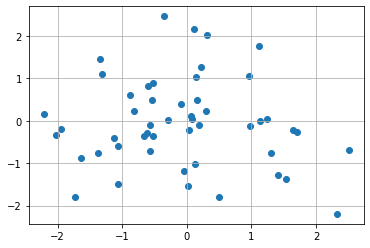

data: x and y
t = -0.6763, df = 48, p-value = 0.5021
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
[-0.36561448  0.18622993]
sample estimates:
cor
-0.09715392041427845
(-1.0, 0.0)


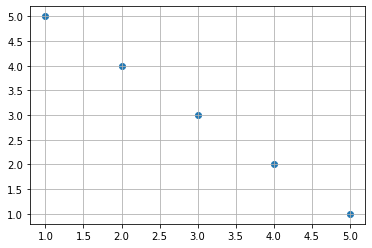

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np


def cortest(corr, lenX):
    # t value
    t = corr[0] * ((len(X) - 2) / (1 - corr[0] ** 2)) ** 0.5
    print("data: x and y")
    print("t = {}, df = {}, p-value = {}".format(round(t, 5), len(X) - 2, round(stats.t.sf(np.abs(t), 48) * 2, 5)))

    # Use the Fisher transformation to get z
    z = np.arctanh(corr[0])
    # print("z value: {}".format(z))

    # And, the sigma value i.e standard error
    sigma = (1 / ((len(X) - 3) ** 0.5))
    # print("sigma value: {}".format(sigma))

    # Get normal 95% interval probability density function for normal continuous random variable apply two-sided conditional formula
    cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1 + 0.95) / 2)

    # Finally take hyperbolic tangent to get interval values for 95%
    interval = np.tanh(cint)

    if corr != 0:
        print("alternative hypothesis: true correlation is not equal to 0")
    print("95 percent confidence interval:")
    print(interval)
    print("sample estimates:")
    print("cor")
    print(corr[0])


# так вычисляем корреляцию
X = stats.norm.rvs(loc=0, scale=1, size=50)
Y = stats.norm.rvs(loc=0, scale=1, size=50)
corr = stats.pearsonr(X, Y)

print(corr)

# так строим scatter plot
plt.scatter(X, Y)
plt.grid()
plt.show()

# print("correlation: {}".format(corr))

# т.к. из лекции мы не знаем выборки, то сразу подставляем корреляцию из лекции
#cortest((0.2858888,), 50)
cortest((corr), 50)

# так вычисляем корреляцию
X = [4,5,2,3,1]
Y = [2,1,4,3,5]
corr = stats.pearsonr(X, Y)

print(corr)

# так строим scatter plot
plt.scatter(X, Y)
plt.grid()
plt.show()

